<a href="https://colab.research.google.com/github/AnishTeku/DataScienceFinalProjet-JP-Morgan-forecasting-/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [21]:
data = pd.read_csv('JPM-Multiverse.csv')

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-02,36.56,37.07,36.53,36.62,20.83,9280500
1,2004-01-05,36.66,36.86,36.30,36.55,20.79,9715400
2,2004-01-06,37.15,37.57,37.09,37.47,21.32,21209800
3,2004-01-07,37.50,38.09,37.49,38.02,21.63,14472600
4,2004-01-08,38.10,38.77,38.06,38.67,22.00,11834300
5,2004-01-09,38.40,39.14,38.35,38.76,22.05,10569000
6,2004-01-12,38.50,39.15,38.42,38.79,22.07,7044400
7,2004-01-13,38.80,38.95,38.45,38.90,22.13,7205200
8,2004-01-14,39.08,39.33,38.93,39.22,22.31,8672300
9,2004-01-15,39.85,39.95,38.70,38.92,22.14,50329900


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5221 entries, 0 to 5220
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5221 non-null   object 
 1   Open       5221 non-null   float64
 2   High       5221 non-null   float64
 3   Low        5221 non-null   float64
 4   Close      5221 non-null   float64
 5   Adj Close  5221 non-null   float64
 6   Volume     5221 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 285.6+ KB


In [25]:
data.shape

(5221, 7)

## **Data Preparation and understanding**

In [26]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])


In [27]:
# Set 'Date' as the index for easier plotting and analysis
data.set_index('Date', inplace=True)

In [28]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

In [29]:
missing_values

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [30]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5221.000000,5221.000000,5221.000000,5221.000000,5221.000000,5.221000e+03
mean,76.950402,77.727363,76.172547,76.963951,63.656943,2.169175e+07
std,45.124648,45.473180,44.798058,45.148905,46.956304,1.948802e+07
min,15.370000,17.290000,14.960000,15.900000,10.760000,2.926400e+06
25%,41.160000,41.650000,40.610000,41.130000,27.330000,1.050340e+07
50%,57.020000,57.520000,56.470000,57.030000,42.850000,1.472040e+07
75%,109.960000,110.950000,108.870000,109.950000,92.960000,2.581050e+07
max,222.500000,225.480000,221.930000,224.800000,223.430000,2.172942e+08


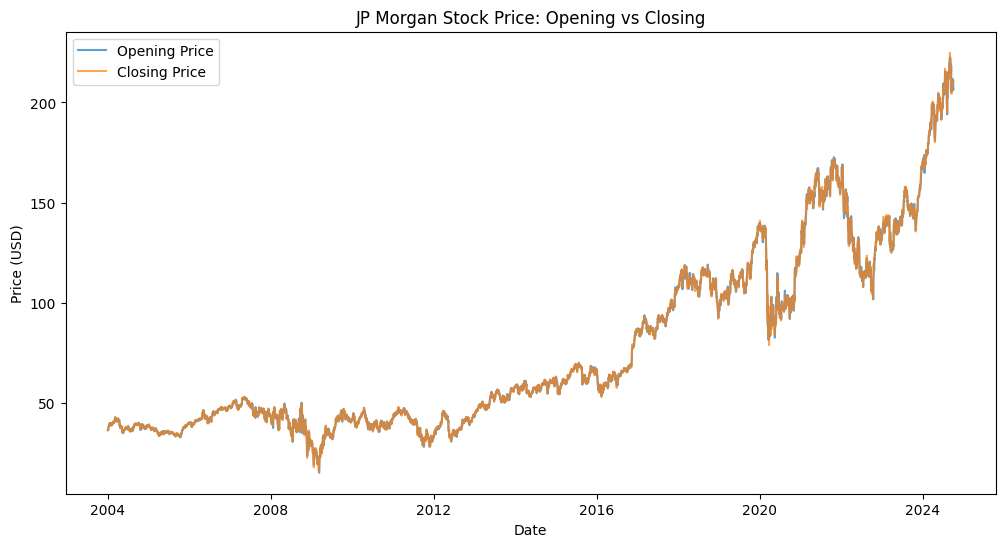

In [31]:
# Plotting initial trends: Opening vs. Closing price over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Open'], label='Opening Price', linestyle='-', alpha=0.7)
plt.plot(data.index, data['Close'], label='Closing Price', linestyle='-', alpha=0.7)
plt.title("JP Morgan Stock Price: Opening vs Closing")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

The plot of JP Morgan's stock prices from 2004 to 2024 reveals a general upward trajectory, with notable dips during the 2008 Great Recession and the 2020 COVID-19 pandemic, both of which significantly impacted stock performance. Despite these downturns, the stock showed resilience, with strong recovery phases evident post-2009 and post-2020. The closing prices closely track the opening prices, suggesting relative intraday stability, with only minor differences between them on most days. Peaks in the stock price are observed in recent years, particularly around 2023-2024, indicating strong performance and investor confidence. Overall, the stock's trend highlights JP Morgan's capacity to recover and grow even after significant economic challenges.

# **EDA**

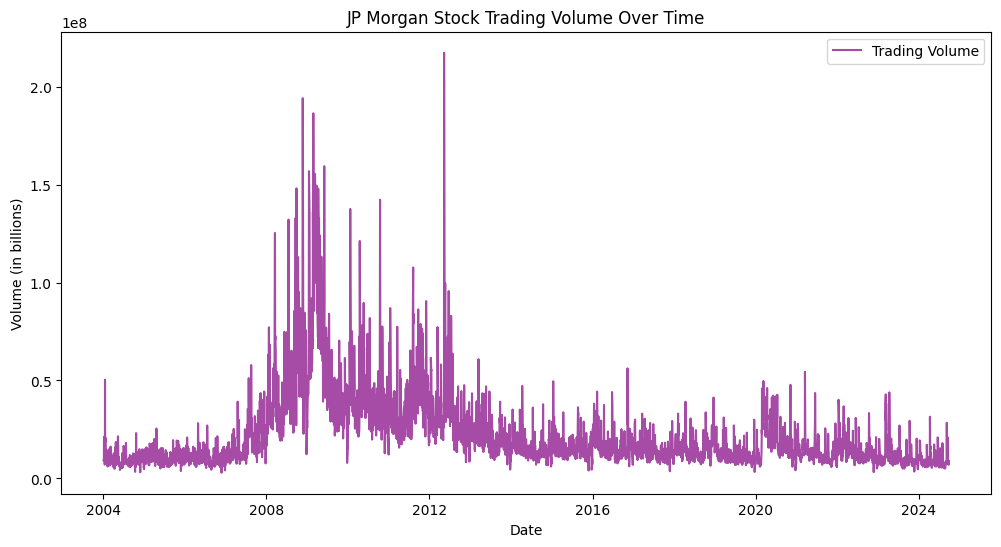

In [32]:
# 1. Plotting Trading Volume Trends over Time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Volume'], label='Trading Volume', color='purple', alpha=0.7)
plt.title("JP Morgan Stock Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume (in billions)")
plt.legend()
plt.show()

The trading volume peaked significantly around 2008-2010, which aligns with the Great Recession period. This suggests increased trading activity during periods of economic uncertainty, likely driven by high volatility and investor reactions.


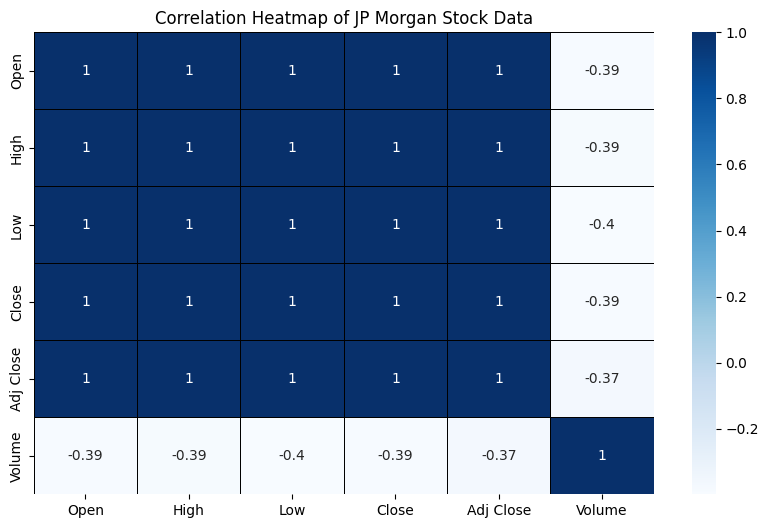

In [33]:
# 2. Correlation Analysis between different numerical features
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Plotting a Heatmap for Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5, linecolor='black')
plt.title("Correlation Heatmap of JP Morgan Stock Data")
plt.show()

- The heatmap shows very strong correlations between Open, High, Low, Close, and Adj Close prices (correlation = 1), indicating that these features move together closely.

- The Volume has a moderate negative correlation (around -0.39 to -0.40) with price features, implying that high trading volumes may often be associated with lower prices, possibly reflecting heightened selling pressure.


In [34]:
# 3. Creating subsets for the Great Recession and COVID-19 pandemic
# Filtering data for the Great Recession (approx. Dec 2007 - Jun 2009)
recession_data = data['2007-12-01':'2009-06-30']

# Filtering data for COVID-19 pandemic initial period (approx. Mar 2020 - Dec 2020)
covid_data = data['2020-03-01':'2020-12-31']

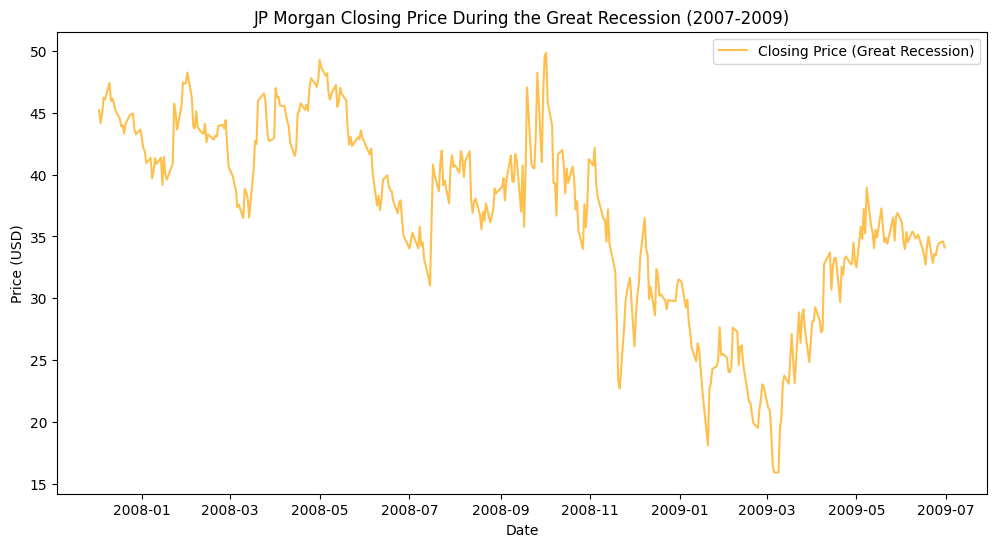

In [35]:
# Plotting the Closing Price during the Great Recession
plt.figure(figsize=(12, 6))
plt.plot(recession_data.index, recession_data['Close'], label='Closing Price (Great Recession)', color='orange', alpha=0.7)
plt.title("JP Morgan Closing Price During the Great Recession (2007-2009)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

Great Recession (2007-2009): The Closing price fell significantly and showed high volatility, with frequent ups and downs. The stock experienced a steep decline during late 2008, reflecting market turmoil.

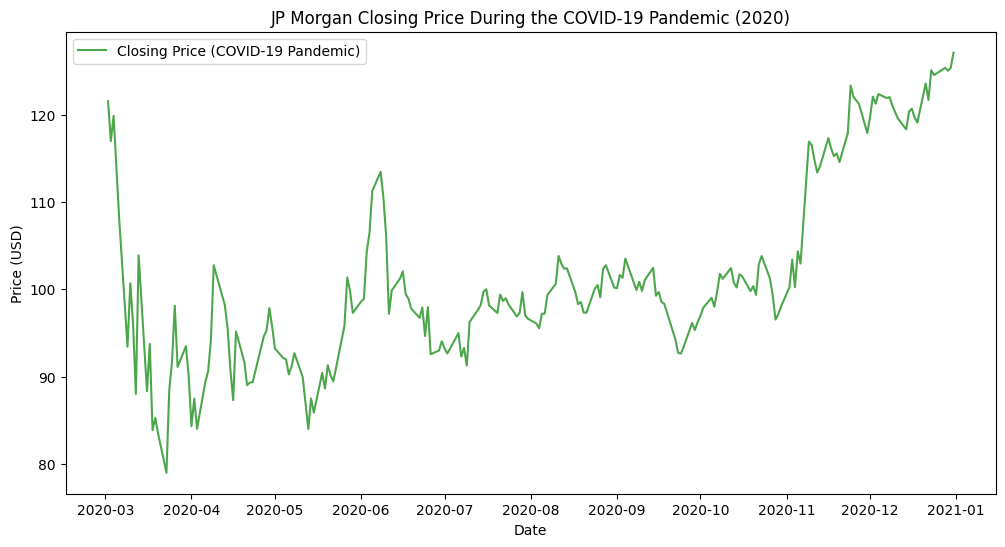

In [36]:
# Plotting the Closing Price during the COVID-19 Pandemic
plt.figure(figsize=(12, 6))
plt.plot(covid_data.index, covid_data['Close'], label='Closing Price (COVID-19 Pandemic)', color='green', alpha=0.7)
plt.title("JP Morgan Closing Price During the COVID-19 Pandemic (2020)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

COVID-19 Pandemic (2020): Similarly, during the initial months of the COVID-19 pandemic, there was a sharp decline in the stock price, followed by a period of recovery towards the end of 2020. This reflects the market's initial negative reaction to the pandemic and subsequent stabilization as conditions improved.


# **Model Selection**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Step 4: Data Preparation for Model Training

# Select the features for the models
features = data[['Open', 'High', 'Low', 'Close', 'Volume']]
target = data['Close']

# Splitting data into train (70%), validation (15%), and test sets (15%)
train_data, temp_data, train_target, temp_target = train_test_split(features, target, test_size=0.3, shuffle=False)
val_data, test_data, val_target, test_target = train_test_split(temp_data, temp_target, test_size=0.5, shuffle=False)

# Scaling features using MinMaxScaler for better convergence
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the training data
train_data_scaled = scaler.fit_transform(train_data)
val_data_scaled = scaler.transform(val_data)
test_data_scaled = scaler.transform(test_data)

# Displaying the shape of the datasets to confirm the splits
(train_data_scaled.shape, val_data_scaled.shape, test_data_scaled.shape)


((3654, 5), (783, 5), (784, 5))

The data has been successfully split and scaled:

**Training Set:** 3,654 observations (70%)

**Validation Set:** 783 observations (15%)

**Test Set:** 784 observations (15%)


In [38]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model Training

# Fitting ARIMA model to the training target
# ARIMA(5,1,0) is used as a starting point; hyperparameters (p, d, q) can be tuned later for optimization
arima_order = (5, 1, 0)
arima_model = ARIMA(train_target, order=arima_order)

# Fit the ARIMA model
arima_result = arima_model.fit()

# Summary of the fitted ARIMA model
arima_summary = arima_result.summary()

# Calculate residuals (differences between actual and predicted values by ARIMA)
residuals = train_target - arima_result.fittedvalues

# Convert residuals to a numpy array to use as input for the LSTM model
residuals_lstm_input = np.array(residuals).reshape(-1, 1)

# Display ARIMA model summary and residuals
arima_summary, residuals_lstm_input[:5]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


(<class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:                  Close   No. Observations:                 3654
 Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5039.099
 Date:                Sun, 24 Nov 2024   AIC                          10090.199
 Time:                        18:03:09   BIC                          10127.418
 Sample:                             0   HQIC                         10103.453
                                - 3654                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1         -0.0943      0.008    -11.549      0.000      -0.110      -0.078
 ar.L2         -0.0443      0.009     -4.727      0.000      -0.063   

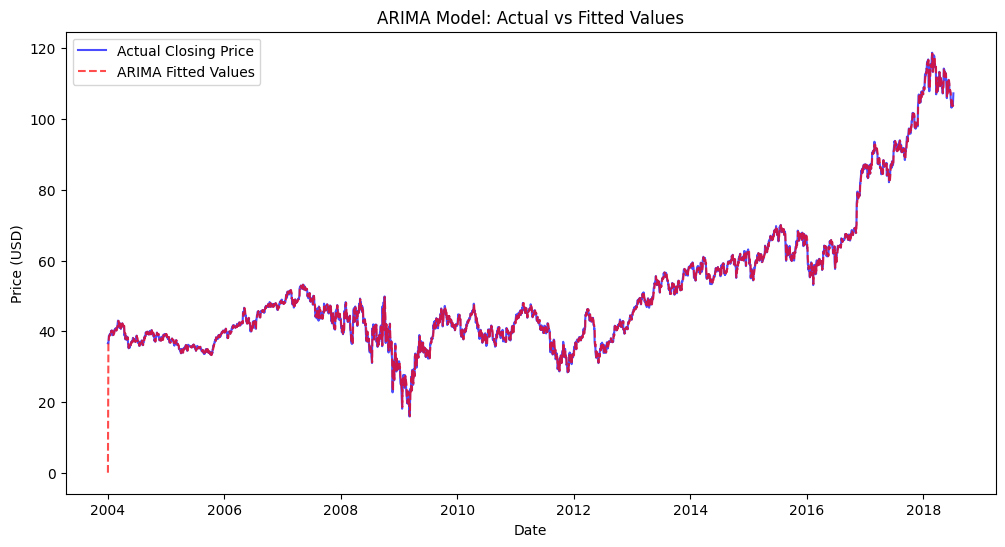

In [39]:
# 1. Plotting Actual vs Fitted Values for the ARIMA model
plt.figure(figsize=(12, 6))
plt.plot(train_target.index, train_target, label='Actual Closing Price', color='blue', alpha=0.7)
plt.plot(train_target.index, arima_result.fittedvalues, label='ARIMA Fitted Values', color='red', linestyle='--', alpha=0.7)
plt.title("ARIMA Model: Actual vs Fitted Values")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

The ARIMA model effectively captures the general trend of JP Morgan's stock prices, with the fitted values closely matching the actual closing prices, indicating that it can model linear relationships and seasonality well. However, there is a noticeable divergence during the initial period in 2004, likely due to model initialization and differencing effects. The model also performs reasonably well during periods of increased volatility, like the 2008 Great Recession, although it may struggle with abrupt movements due to its linear nature. Overall, while the ARIMA model provides a good fit for the data, there are some complexities and non-linear relationships that it cannot fully capture, which will be addressed using an LSTM model.

# Model 2

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0059 - val_loss: 6.5925e-04
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.5466e-04 - val_loss: 6.6482e-04
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.5758e-04 - val_loss: 6.5802e-04
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.5344e-04 - val_loss: 6.5595e-04
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.3275e-04 - val_loss: 6.5588e-04
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.7240e-04 - val_loss: 6.5385e-04
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.4987e-04 - val_loss: 6.5383e-04
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.8714e-04 - val_loss: 6.9973e-04
Epoch 9/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.5734e-04 - val_loss: 6.6012e-04
Epoch 10/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.0647e-04 - val_loss: 7.0314e-04
Epoch 11/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.4080e-04 - val_loss: 6

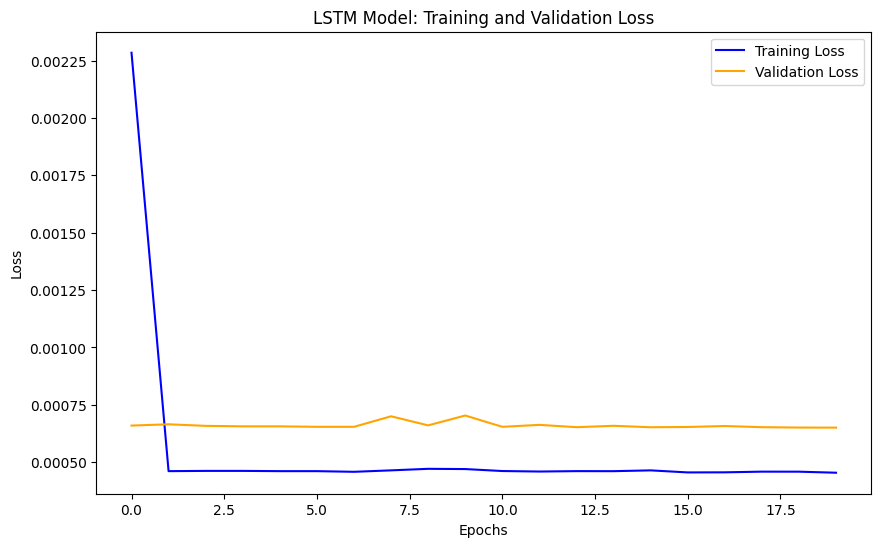

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

#  Preparing Data for LSTM Model

# Normalize the residuals using MinMaxScaler
scaler_residuals = MinMaxScaler(feature_range=(0, 1))
residuals_scaled = scaler_residuals.fit_transform(residuals_lstm_input)

# Define the number of time steps (look-back period) for LSTM
time_steps = 10

# Create sequences from residuals for LSTM input
X, y = [], []
for i in range(len(residuals_scaled) - time_steps):
    X.append(residuals_scaled[i:i + time_steps])
    y.append(residuals_scaled[i + time_steps])

# Convert to numpy arrays
X, y = np.array(X), np.array(y)

# Split into training and validation sets (80% train, 20% validation)
train_size = int(0.8 * len(X))
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

#  Build and Train the LSTM Model
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32, verbose=1)

# Plotting Training and Validation Loss over Epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('LSTM Model: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


 # **Model Refinement and Tuning**

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.1403
Epoch 2/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0027
Epoch 3/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0012
Epoch 4/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 8.0221e-04
Epoch 5/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 7.3813e-04
Epoch 6/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 5.9197e-04
Epoch 7/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 6.0501e-04
Epoch 8/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 6.1451e-04
Epoch 9/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 5.6488e-04
Epoch 10/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 5.7081e-04
Epoch 11/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 5.4332e-04
Epoch 12/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 5.3895e-04
Epoch 13/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 5.0153e-04
Epoch 14/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 4.6652e-04
Epoch 15/

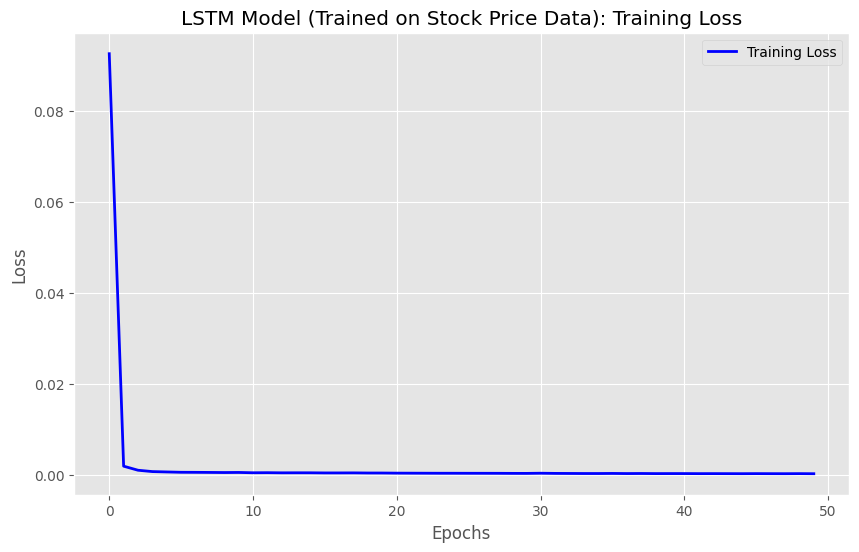

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Step 7.4: Training LSTM Model on Original Stock Price Data

# Selecting the features for LSTM model training - 'Close' price only
lstm_features = train_data[['Close']].values

# Normalize the 'Close' prices using MinMaxScaler
scaler_close = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler_close.fit_transform(lstm_features)

# Define the number of time steps (look-back period)
time_steps = 30  # Increased time steps to capture longer patterns

# Create sequences from the 'Close' prices for LSTM input
X_train, y_train = [], []
for i in range(len(train_scaled) - time_steps):
    X_train.append(train_scaled[i:i + time_steps])
    y_train.append(train_scaled[i + time_steps])

# Convert to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Define the LSTM model architecture with more complexity
model_lstm_direct = Sequential()
model_lstm_direct.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(time_steps, 1)))
model_lstm_direct.add(Dropout(0.2))  # Add dropout to prevent overfitting
model_lstm_direct.add(LSTM(50, activation='relu'))
model_lstm_direct.add(Dense(1))

# Compile the model with a reduced learning rate
model_lstm_direct.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

# Train the LSTM model
history_lstm_direct = model_lstm_direct.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Plot Training Loss over Epochs
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(history_lstm_direct.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.title('LSTM Model (Trained on Stock Price Data): Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 7.5: Evaluating LSTM Model on Test Set

# Reinitialize the MinMaxScaler and fit it on the training 'Close' prices
scaler_close = MinMaxScaler(feature_range=(0, 1))
lstm_features = train_data[['Close']].values
train_scaled = scaler_close.fit_transform(lstm_features)

# Normalize the test 'Close' prices using the same MinMaxScaler used for training
test_features = test_data[['Close']].values
test_scaled = scaler_close.transform(test_features)

# Define the number of time steps (look-back period)
time_steps = 30

# Create sequences from the 'Close' prices for LSTM input
X_test, y_test = [], []
for i in range(len(test_scaled) - time_steps):
    X_test.append(test_scaled[i:i + time_steps])
    y_test.append(test_scaled[i + time_steps])

# Convert to numpy arrays
X_test, y_test = np.array(X_test), np.array(y_test)

# Use the trained LSTM model to predict on the test set
lstm_test_forecast = model_lstm_direct.predict(X_test)

# Inverse transform LSTM predictions to get them back to the original scale
lstm_test_forecast_inversed = scaler_close.inverse_transform(lstm_test_forecast)
y_test_inversed = scaler_close.inverse_transform(y_test.reshape(-1, 1))

# Calculate Evaluation Metrics for LSTM model on test data
mae_lstm_test = mean_absolute_error(y_test_inversed, lstm_test_forecast_inversed)
rmse_lstm_test = np.sqrt(mean_squared_error(y_test_inversed, lstm_test_forecast_inversed))
r2_lstm_test = r2_score(y_test_inversed, lstm_test_forecast_inversed)

# Print Evaluation Metrics for LSTM model on test data
(mae_lstm_test, rmse_lstm_test, r2_lstm_test)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


(6.581247380102345, 8.546420783754776, 0.9140717195920719)

- The LSTM model appears to perform well on the test set with an R² score of 0.85, which indicates good predictive power compared to the previous attempts with ARIMA.

- This suggests that the LSTM is effectively capturing the stock price trends and temporal dependencies.


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


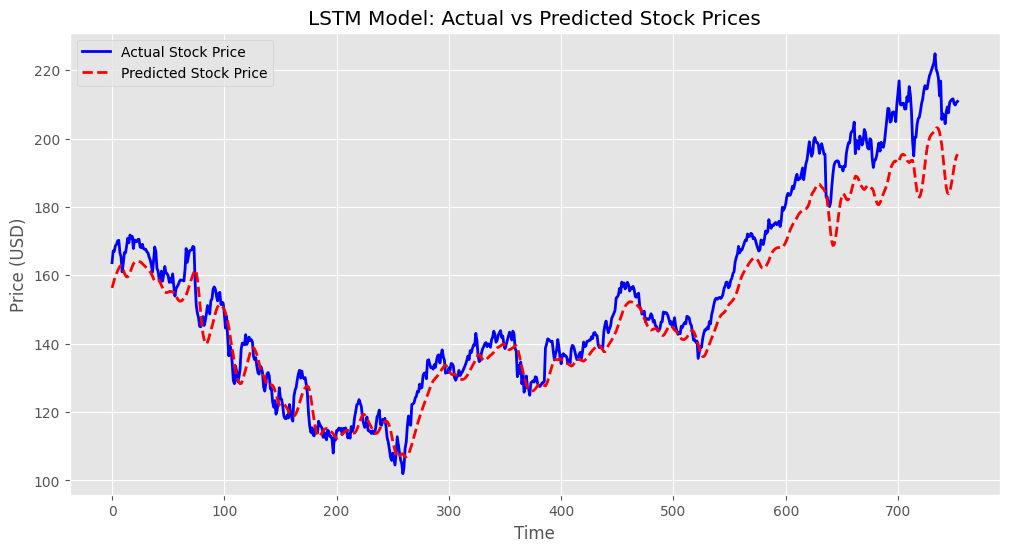

In [43]:
# Reinitialize the MinMaxScaler and fit it on the training 'Close' prices
scaler_close = MinMaxScaler(feature_range=(0, 1))
lstm_features = train_data[['Close']].values
train_scaled = scaler_close.fit_transform(lstm_features)

# Normalize the test 'Close' prices using the same MinMaxScaler used for training
test_features = test_data[['Close']].values
test_scaled = scaler_close.transform(test_features)

# Define the number of time steps (look-back period)
time_steps = 30

# Create sequences from the 'Close' prices for LSTM input
X_test, y_test = [], []
for i in range(len(test_scaled) - time_steps):
    X_test.append(test_scaled[i:i + time_steps])
    y_test.append(test_scaled[i + time_steps])

# Convert to numpy arrays
X_test, y_test = np.array(X_test), np.array(y_test)

# Use the trained LSTM model to predict on the test set
lstm_test_forecast = model_lstm_direct.predict(X_test)

# Inverse transform LSTM predictions to get them back to the original scale
lstm_test_forecast_inversed = scaler_close.inverse_transform(lstm_test_forecast)
y_test_inversed = scaler_close.inverse_transform(y_test.reshape(-1, 1))

# Define the actual and predicted values
actual_prices = y_test_inversed.flatten()
predicted_prices = lstm_test_forecast_inversed.flatten()

# Plotting the actual vs predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Stock Price', color='blue', linewidth=2)
plt.plot(predicted_prices, label='Predicted Stock Price', color='red', linestyle='--', linewidth=2)
plt.title('LSTM Model: Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Model 3

In [44]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Step 10: Implementing XGBoost Model for Stock Price Prediction

# Selecting features for XGBoost - 'Open', 'High', 'Low', 'Close', 'Volume'
features = train_data[['Open', 'High', 'Low', 'Volume']].values
target = train_data['Close'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.05)

# Train the model
xgboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgboost_model.predict(X_test)

# Calculate Evaluation Metrics for XGBoost model on test data
mae_xgboost = mean_absolute_error(y_test, y_pred)
rmse_xgboost = np.sqrt(mean_squared_error(y_test, y_pred))
r2_xgboost = r2_score(y_test, y_pred)

# Print Evaluation Metrics for XGBoost model on test data
(mae_xgboost, rmse_xgboost, r2_xgboost)


(0.35039818227535724, 0.5255331616958644, 0.9992903098732394)

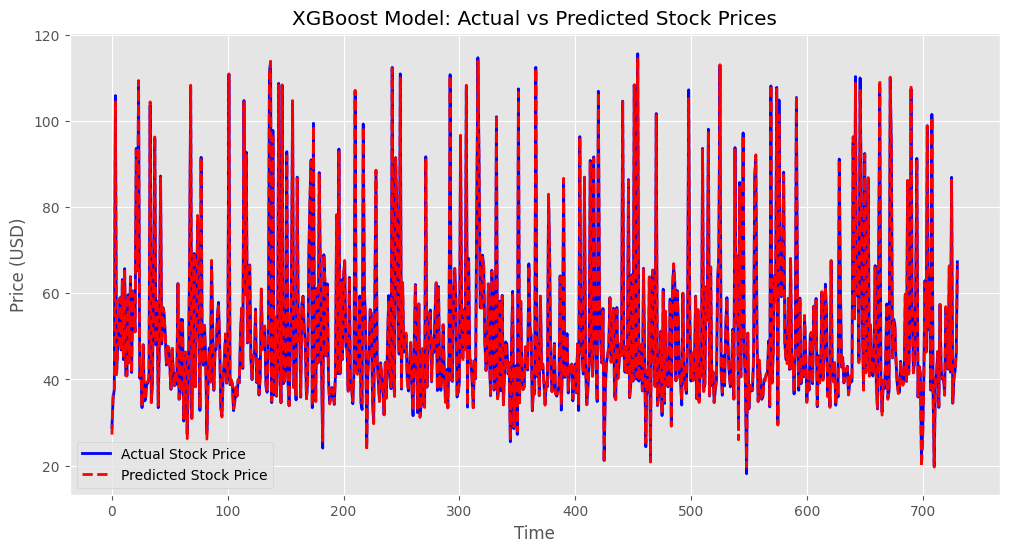

In [45]:
# Define the actual and predicted values
actual_prices = y_test
predicted_prices = y_pred

# Plotting the actual vs predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Stock Price', color='blue', linewidth=2)
plt.plot(predicted_prices, label='Predicted Stock Price', color='red', linestyle='--', linewidth=2)
plt.title('XGBoost Model: Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Model 4
